## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

### 作業１：試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [10]:
results = {}

for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch_size = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-bs-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with batch_size = 2.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3

50000/50000 [==============================] - 746s 15ms/step - loss: 2.2444 - accuracy: 0.1574 - val_loss: 2.2689 - val_accuracy: 0.1943
Epoch 46/50
50000/50000 [==============================] - 765s 15ms/step - loss: 2.2476 - accuracy: 0.1544 - val_loss: 2.6739 - val_accuracy: 0.1605
Epoch 47/50
50000/50000 [==============================] - 768s 15ms/step - loss: 2.2454 - accuracy: 0.1529 - val_loss: 2.6944 - val_accuracy: 0.1901
Epoch 48/50
50000/50000 [==============================] - 752s 15ms/step - loss: 2.2464 - accuracy: 0.1571 - val_loss: 2.6283 - val_accuracy: 0.1792
Epoch 49/50
50000/50000 [==============================] - 753s 15ms/step - loss: 2.2466 - accuracy: 0.1573 - val_loss: 3.0172 - val_accuracy: 0.1605
Epoch 50/50
50000/50000 [==============================] - 749s 15ms/step - loss: 2.2462 - accuracy: 0.1588 - val_loss: 2.5348 - val_accuracy: 0.1862
Experiment with batch_size = 16.000000
Model: "model_1"
________________________________________________________

50000/50000 [==============================] - 99s 2ms/step - loss: 1.1402 - accuracy: 0.5950 - val_loss: 1.3527 - val_accuracy: 0.5246
Epoch 40/50
50000/50000 [==============================] - 98s 2ms/step - loss: 1.1364 - accuracy: 0.5967 - val_loss: 1.3016 - val_accuracy: 0.5471
Epoch 41/50
50000/50000 [==============================] - 101s 2ms/step - loss: 1.1358 - accuracy: 0.5962 - val_loss: 1.3717 - val_accuracy: 0.5184
Epoch 42/50
50000/50000 [==============================] - 99s 2ms/step - loss: 1.1218 - accuracy: 0.6027 - val_loss: 1.3482 - val_accuracy: 0.5252
Epoch 43/50
50000/50000 [==============================] - 101s 2ms/step - loss: 1.1229 - accuracy: 0.6044 - val_loss: 1.3401 - val_accuracy: 0.5320
Epoch 44/50
50000/50000 [==============================] - 99s 2ms/step - loss: 1.1102 - accuracy: 0.6047 - val_loss: 1.3456 - val_accuracy: 0.5303
Epoch 45/50
50000/50000 [==============================] - 98s 2ms/step - loss: 1.1040 - accuracy: 0.6086 - val_loss: 1.39

50000/50000 [==============================] - 54s 1ms/step - loss: 0.9360 - accuracy: 0.6682 - val_loss: 1.4742 - val_accuracy: 0.4987
Epoch 35/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.9291 - accuracy: 0.6691 - val_loss: 1.4916 - val_accuracy: 0.5139
Epoch 36/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.9180 - accuracy: 0.6718 - val_loss: 1.5000 - val_accuracy: 0.5166
Epoch 37/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8966 - accuracy: 0.6821 - val_loss: 1.5760 - val_accuracy: 0.4934
Epoch 38/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8831 - accuracy: 0.6841 - val_loss: 1.5309 - val_accuracy: 0.5015
Epoch 39/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8790 - accuracy: 0.6867 - val_loss: 1.5213 - val_accuracy: 0.5048
Epoch 40/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8732 - accuracy: 0.6901 - val_loss: 1.5308

50000/50000 [==============================] - 20s 401us/step - loss: 0.5713 - accuracy: 0.8007 - val_loss: 2.0909 - val_accuracy: 0.4500
Epoch 29/50
50000/50000 [==============================] - 20s 391us/step - loss: 0.5461 - accuracy: 0.8119 - val_loss: 1.9198 - val_accuracy: 0.4516
Epoch 30/50
50000/50000 [==============================] - 20s 393us/step - loss: 0.5196 - accuracy: 0.8204 - val_loss: 1.9623 - val_accuracy: 0.4569
Epoch 31/50
50000/50000 [==============================] - 20s 402us/step - loss: 0.5107 - accuracy: 0.8217 - val_loss: 2.1400 - val_accuracy: 0.4355
Epoch 32/50
50000/50000 [==============================] - 20s 395us/step - loss: 0.5039 - accuracy: 0.8224 - val_loss: 1.9707 - val_accuracy: 0.4525
Epoch 33/50
50000/50000 [==============================] - 20s 395us/step - loss: 0.4886 - accuracy: 0.8289 - val_loss: 1.9754 - val_accuracy: 0.4814
Epoch 34/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.4665 - accuracy: 0.8380 - va

Epoch 23/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.6692 - accuracy: 0.7746 - val_loss: 1.6301 - val_accuracy: 0.4912
Epoch 24/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.6426 - accuracy: 0.7817 - val_loss: 1.7661 - val_accuracy: 0.4691
Epoch 25/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.6138 - accuracy: 0.7932 - val_loss: 1.8364 - val_accuracy: 0.4697
Epoch 26/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.5904 - accuracy: 0.8017 - val_loss: 1.7194 - val_accuracy: 0.4741
Epoch 27/50
50000/50000 [==============================] - 14s 288us/step - loss: 0.5670 - accuracy: 0.8125 - val_loss: 1.7348 - val_accuracy: 0.4712
Epoch 28/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.5398 - accuracy: 0.8231 - val_loss: 1.8156 - val_accuracy: 0.4761
Epoch 29/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.5145 - accuracy:

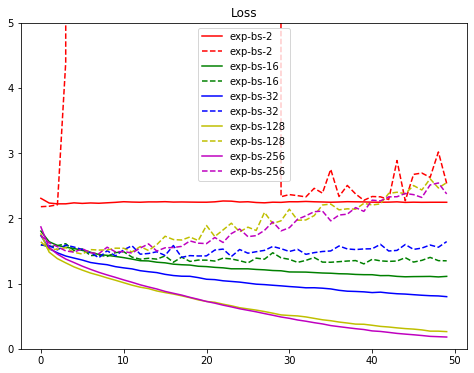

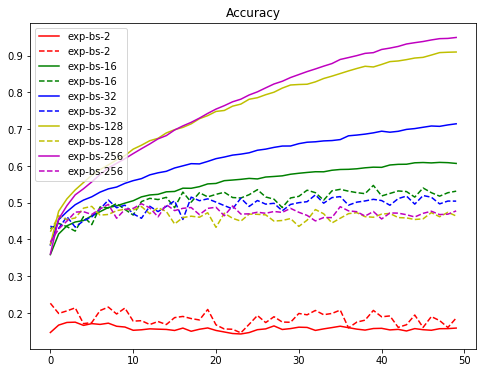

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 作業２：請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [15]:
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [16]:
model2 = build_mlp2(input_shape=x_train.shape[1:])
model2.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]
train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

Epoch 46/50
50000/50000 [==============================] - 19s 370us/step - loss: 0.5252 - accuracy: 0.8558 - val_loss: 1.5328 - val_accuracy: 0.5094
Epoch 47/50
50000/50000 [==============================] - 18s 365us/step - loss: 0.5068 - accuracy: 0.8614 - val_loss: 1.5440 - val_accuracy: 0.5087
Epoch 48/50
50000/50000 [==============================] - 19s 373us/step - loss: 0.4900 - accuracy: 0.8688 - val_loss: 1.5573 - val_accuracy: 0.5080
Epoch 49/50
50000/50000 [==============================] - 18s 369us/step - loss: 0.4729 - accuracy: 0.8741 - val_loss: 1.5703 - val_accuracy: 0.5072
Epoch 50/50
50000/50000 [==============================] - 19s 381us/step - loss: 0.4552 - accuracy: 0.8819 - val_loss: 1.5834 - val_accuracy: 0.5079


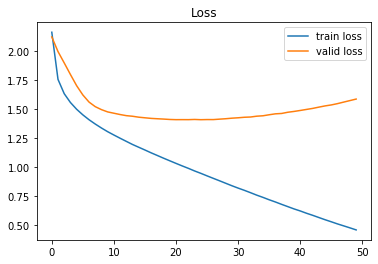

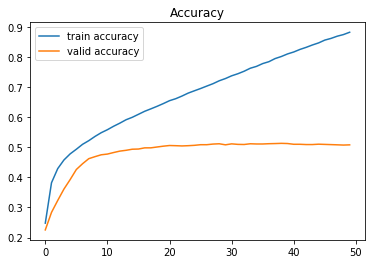

In [17]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 作業３：請於 BN 放在 Input Layer 後，並比較結果

In [18]:
def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [20]:
model3 = build_mlp3(input_shape=x_train.shape[1:])
model3.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model3.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model3.history.history["loss"]
valid_loss = model3.history.history["val_loss"]
train_acc = model3.history.history["accuracy"]
valid_acc = model3.history.history["val_accuracy"]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 19s 378us/step - loss: 0.3593 - accuracy: 0.9213 - val_loss: 1.7786 - val_accuracy: 0.4772
Epoch 47/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.3424 - accuracy: 0.9261 - val_loss: 1.7981 - val_accuracy: 0.4767
Epoch 48/50
50000/50000 [==============================] - 21s 423us/step - loss: 0.3246 - accuracy: 0.9314 - val_loss: 1.8233 - val_accuracy: 0.4733
Epoch 49/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.3062 - accuracy: 0.9383 - val_loss: 1.8371 - val_accuracy: 0.4792
Epoch 50/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.2918 - accuracy: 0.9433 - val_loss: 1.8570 - val_accuracy: 0.4724


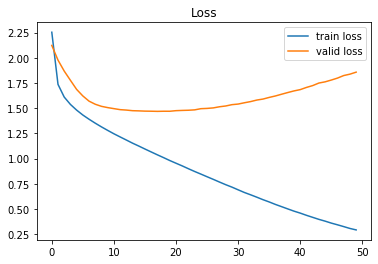

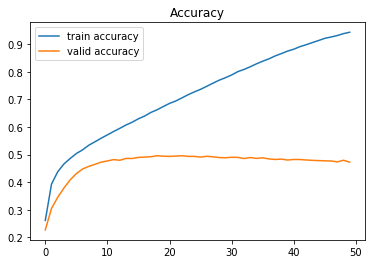

In [21]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()